## **TechHub end-to-end data analytics project**
### **PART 2. Sales Analysis and Customer Segmentation**

In this part, I will use SQL code to uncover meaningful insights about the company's sales performance and segment customers using the RFM method. These queries can be executed directly in database tools such as DBeaver or MySQL Workbench. However, in this project, I will execute the SQL code in this Jupyter notebook to present the results all in one file and provide quick visualizations. A detailed analysis of the results will be provided in the project's report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
import seaborn as sns 
from sqlalchemy import create_engine, text

# MySQL connection details for WampServer
DATABASE_USERNAME = "root"
DATABASE_PASSWORD = ""  
DATABASE_HOST = "localhost"
DATABASE_NAME = "techhub"  

# Create SQLAlchemy engine for MySQL
engine = create_engine(f"mysql+pymysql://{DATABASE_USERNAME}:{DATABASE_PASSWORD}@{DATABASE_HOST}/{DATABASE_NAME}")

# Test connection
with engine.connect() as connection:
    print("✅ Successfully connected to MySQL database in WampServer!")

✅ Successfully connected to MySQL database in WampServer!


#### **I. Sales Analysis**
#### **1. Sales Trends Analysis**


In this section, I will demonstrate basic to intermediate SQL skills, such as **GROUP BY, ORDER BY, Aggregate functions**, and **JOIN**, to retrieve results related to the company's sales performance. First, we will summarize the data.

In [2]:
query = """
SELECT 
    COUNT(DISTINCT o.order_id) AS total_orders,
    COUNT(DISTINCT o.customer_id) AS total_customers,
    COUNT(DISTINCT od.product_id) AS total_products,
    ROUND(SUM(p.price_each * od.quantity), 2) AS total_sales,
    ROUND(SUM(od.quantity * p.cost_each), 2) AS total_costs,
    ROUND(SUM((p.price_each - p.cost_each) * od.quantity), 2) AS total_profits
FROM orders o
LEFT JOIN order_detail od
    ON o.order_id = od.order_id
LEFT JOIN product p
    ON od.product_id = p.product_id
"""

# Execute query and store result in a DataFrame
sales_summary = pd.read_sql(query, con=engine)

# Display result
sales_summary

,total_orders,total_customers,total_products,total_sales,total_costs,total_profits
0,178437,140787,19,51737902.78,26397202.09,25340700.68


#### **1.1 Total Sales per month**

In [3]:
query = """
SELECT d.month, ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
JOIN date d ON o.date_id = d.date_id
GROUP BY d.month
ORDER BY d.month;
"""

# Execute query and store result in a DataFrame
sales_by_month = pd.read_sql(query, con=engine)

# Display result
sales_by_month

,month,total_sales
0,1,2733375.99
1,2,3303022.11
2,3,4210635.52
3,4,5085987.59
4,5,4728894.30
5,6,3866690.86
6,7,3971649.66
7,8,3366690.72
8,9,3146328.72
9,10,5605070.10


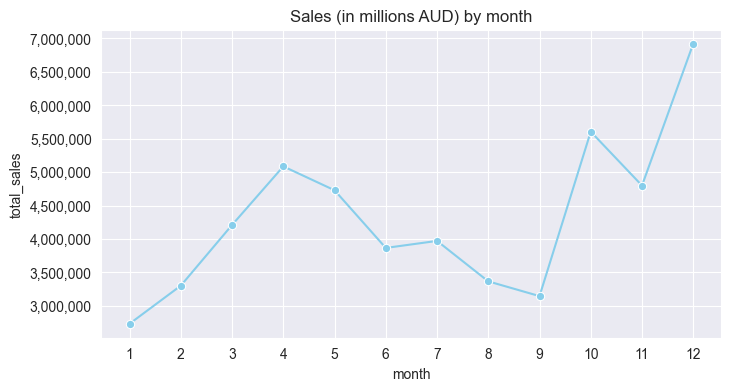

In [23]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
ax = sns.lineplot(data=sales_by_month, marker='o', x='month', y='total_sales', color='skyblue')

# Show all hours
ax.set_xticks(sales_by_month['month'])  
ax.set_title('Sales (in millions AUD) by month')

ax.yaxis.set_major_locator(MultipleLocator(500000))  # Tick every 500,000
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

#### 1.2 Daily and Hourly Sales trend

In [7]:
query = """
SELECT d.weekday, ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
LEFT JOIN date d
    ON o.date_id = d.date_id
GROUP BY d.weekday
ORDER BY 
    CASE d.weekday
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' THEN 6
    ELSE 7
    END
"""

# Execute query and store result in a DataFrame
sales_weekday = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
sales_weekday

,weekday,total_sales
0,Monday,7483209.01
1,Tuesday,7259173.11
2,Wednesday,7283881.09
3,Thursday,7356509.68
4,Friday,7398228.25
5,Saturday,7324964.13
6,Sunday,7631908.31


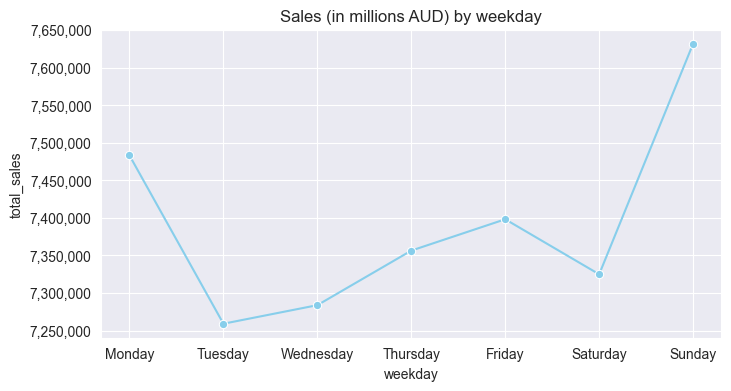

In [ ]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
ax = sns.lineplot(data=sales_weekday, marker='o', x='weekday', y='total_sales', color='skyblue')

# Show all hours
ax.set_xticks(sales_weekday['weekday'])  
ax.set_title('Sales (in millions AUD) by weekday')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [20]:
query = """
SELECT d.hour, ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
LEFT JOIN date d
    ON o.date_id = d.date_id
GROUP BY d.hour
ORDER BY d.hour
"""

# Execute query and store result in a DataFrame
sales_by_hour = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
sales_by_hour

,hour,total_sales
0,0,1070578.29
1,1,691298.17
2,2,352275.88
3,3,218636.15
4,4,243990.74
5,5,346018.20
6,6,672166.89
7,7,1117276.96
8,8,1788517.39
9,9,2458537.92


To see the trend by hour more clearly we will create a line plot

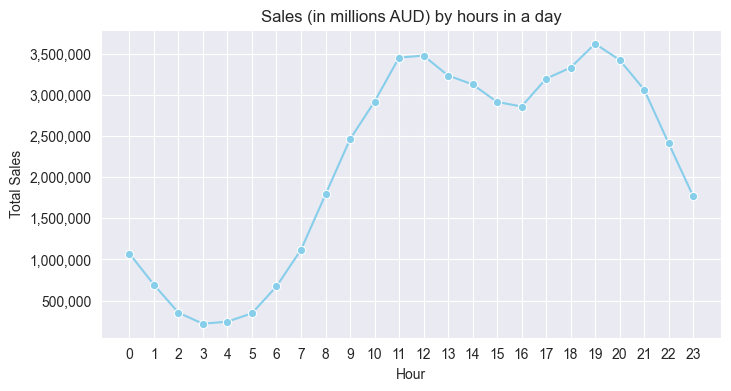

In [29]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
ax = sns.lineplot(data=sales_by_hour, marker='o', x='hour', y='total_sales', color='skyblue')

# Show all hours
ax.set_xticks(sales_by_hour['hour'])  
ax.set_title('Sales (in millions AUD) by hours in a day')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Hour')
plt.ylabel('Total Sales')

plt.show()

#### **2. Product Performance**
#### **2.1. Best-selling and worst-selling products**

In [25]:
query = """
SELECT 
    p.product_name, 
    SUM(od.quantity) AS total_quantity, 
    ROUND(SUM(od.line_total), 2) AS total_revenue
FROM order_detail od
JOIN product p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 5

"""

# Execute query and store result in a DataFrame
top_5 = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
top_5

,product_name,total_quantity,total_revenue
0,Macbook Pro Laptop,4728.0,12056400.00
1,iPhone,6849.0,7191450.00
2,ThinkPad Laptop,4130.0,6194958.64
3,Google Phone,5532.0,4978800.00
4,27in 4K Gaming Monitor,6244.0,3652677.36


In [6]:
query = """
SELECT 
    p.product_name, 
    SUM(od.quantity) AS total_quantity, 
    ROUND(SUM(od.line_total), 2) AS total_revenue
FROM order_detail od
JOIN product p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue ASC
LIMIT 5
"""

# Execute query and store result in a DataFrame
bottom_5 = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
bottom_5

,product_name,total_quantity,total_revenue
0,AAA Batteries (4-pack),31017.0,139186.46
1,AA Batteries (4-pack),27635.0,159177.61
2,Wired Headphones,20557.0,369630.19
3,USB-C Charging Cable,23975.0,429650.99
4,Lightning Charging Cable,23217.0,520540.66


#### **3. Sales by Category**

In [ ]:
query = """
SELECT 
    p.category, 
    SUM(od.quantity) AS total_quantity, 
    ROUND(SUM(od.line_total), 2) AS total_revenue,
    ROUND(SUM(od.line_total - (od.quantity * p.cost_each)), 2) AS total_profit
FROM order_detail od
JOIN product p 
    ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY total_revenue DESC
"""

# Execute query and store result in a DataFrame
sales_by_category = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
sales_by_category

,category,total_quantity,total_revenue,total_profit
0,Laptops,8858.0,18251358.64,8939447.04
1,Smartphones,14449.0,13411050.00,6568732.19
2,TV & Monitors,28941.0,11734471.92,5747518.64
3,Headphones,49675.0,5911637.32,2895311.61
4,Accessories,105844.0,1248555.71,611306.17
5,Home Appliances,1312.0,1180800.00,578355.85


#### **4. Location-based Analysis**

In [27]:
query = """
SELECT 
    a.city, 
    ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
JOIN customer_address ca ON o.customer_id = ca.customer_id
JOIN address a ON ca.address_id = a.address_id
GROUP BY a.city
ORDER BY total_sales DESC;
"""

# Execute query and store result in a DataFrame
sales_by_city = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
sales_by_city

,city,total_sales
0,Sydney,12393260.94
1,Melbourne,8178827.13
2,Brisbane,6996452.85
3,Adelaide,5492444.40
4,Hobart,4193233.04
5,Gold Coast,4151949.07
6,Perth,4121619.65
7,Canberra,3480724.06
8,Newcastle,2729362.44


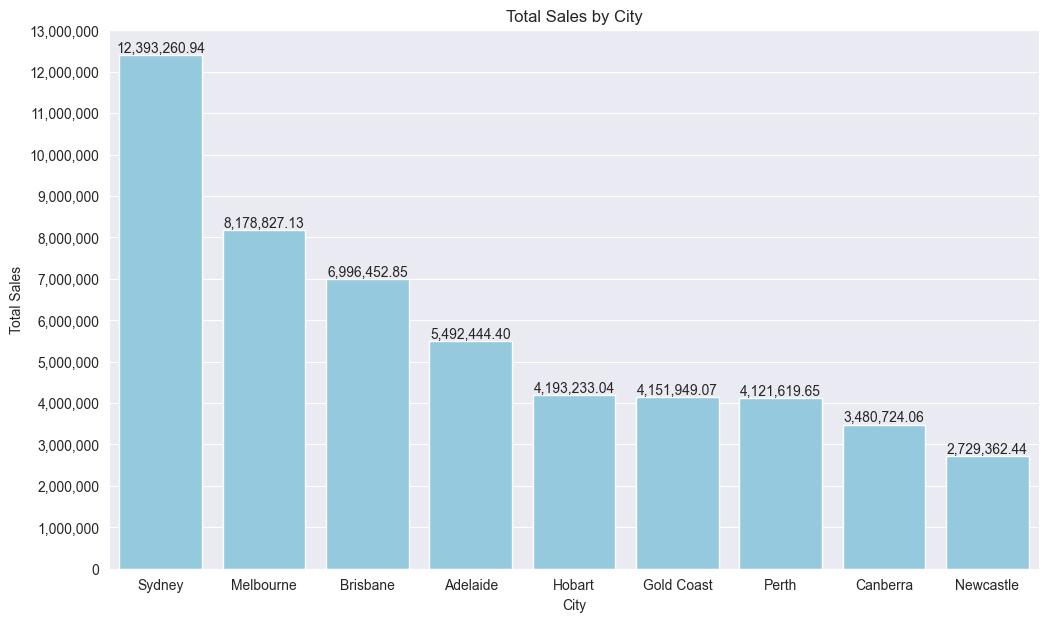

In [41]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=sales_by_city, x='city', y='total_sales', color='skyblue')

for i in range(len(sales_by_city)):
    ax.text(i, sales_by_city['total_sales'][i] + 0.1, f'{sales_by_city['total_sales'][i]:,.2f}', ha='center', va='bottom')

# Format y-axis to show full numbers 
ax.yaxis.set_major_locator(MultipleLocator(1000000))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set the plot title and labels
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)

# Show the plot
plt.show()


In [30]:
query = """
SELECT 
    a.state, 
    ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
JOIN customer_address ca 
    ON o.customer_id = ca.customer_id
JOIN address a 
    ON ca.address_id = a.address_id
GROUP BY a.state
ORDER BY total_sales DESC
"""

# Execute query and store result in a DataFrame
sales_by_state = pd.read_sql(query, con=engine)
pd.read_sql(query, con=engine)
# Display result
sales_by_state

,state,total_sales
0,NSW,15172485.46
1,QLD,11148401.93
2,VIC,8178827.13
3,SA,5492444.40
4,TAS,4193233.04
5,WA,4121619.65
6,ACT,3430861.98


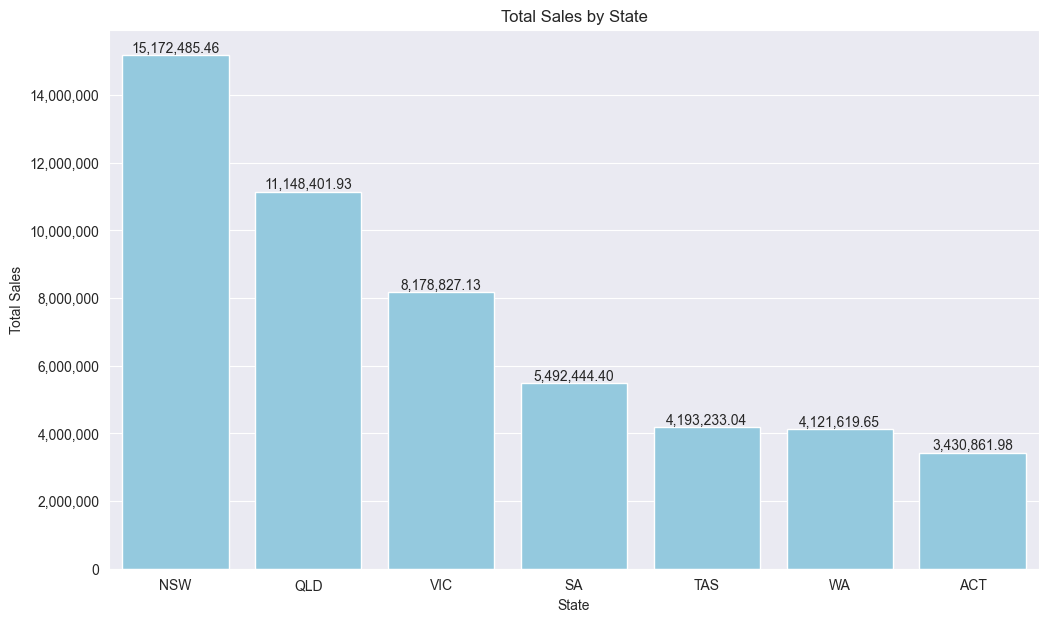

In [43]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=sales_by_state, x='state', y='total_sales', color='skyblue')

for i in range(len(sales_by_state)):
    ax.text(i, sales_by_state['total_sales'][i] + 0.1, f'{sales_by_state['total_sales'][i]:,.2f}', ha='center', va='bottom')

# Format y-axis to show full numbers 
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set the plot title and labels
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)

# Show the plot
plt.show()


### II. Customer Segmentation

Next, I will apply more advanced SQL techniques, including **Common Table Expressions (CTEs)**, **window functions** (e.g., PERCENT_RANK()), and the **CASE statement** to calculate RFM scores and categorize customers into five segments.

In [ ]:
create_table_query = """
CREATE TABLE customer_segmentation AS
WITH customer_stats AS (
    SELECT 
        c.customer_id,
        DATEDIFF('2024-01-02', MAX(d.date)) AS recency,
        COUNT(o.order_id) AS frequency,
        ROUND(SUM(o.total_amount), 2) AS monetary
    FROM orders o
    JOIN customer c ON o.customer_id = c.customer_id
    JOIN date d ON o.date_id = d.date_id
    GROUP BY c.customer_id
),
stats_rank AS (
    SELECT 
        *,
        PERCENT_RANK() OVER(ORDER BY recency DESC) AS r_rank,
        PERCENT_RANK() OVER(ORDER BY frequency) AS f_rank,
        PERCENT_RANK() OVER(ORDER BY monetary) AS m_rank
    FROM customer_stats
),
rfm_rank AS (
    SELECT *,
        CASE 
            WHEN r_rank <= 0.25 THEN 1
            WHEN r_rank <= 0.5 THEN 2
            WHEN r_rank <= 0.75 THEN 3
            ELSE 4
        END AS r,
        CASE WHEN f_rank <= 0.25 THEN 1
                WHEN f_rank <= 0.5 THEN 2
                WHEN f_rank <= 0.75 THEN 3
                ELSE 4 
        END AS f,
        CASE WHEN m_rank <= 0.25 THEN 1
                WHEN m_rank <= 0.5 THEN 2
                WHEN m_rank <= 0.75 THEN 3
                ELSE 4 
        END AS m   
    FROM stats_rank
),
rfm_score AS (
SELECT *,
    CONCAT(R, F, M) AS rfm
FROM rfm_rank
)
SELECT *,
    CASE WHEN rfm IN ('343','443','344','444') THEN 'VIP' 
        WHEN rfm IN ('243','143','244','144') THEN 'Loyal'
        WHEN rfm IN ('311','411','341','441','412','312','342','442','313','413','314','414') THEN 'Potential'
        WHEN rfm IN ('113','213','114','214') THEN 'Occasional Spender'
        when rfm in ('211','111','241','141','242','142','112','212') then 'One-time'
    END AS customer_segment
FROM rfm_score
"""

# Execute the create table query first
with engine.connect() as conn:
    # Wrap the query with text() for it to be executable
    conn.execute(text(create_table_query))

# Run a separate query to select data from the created table
select_query = "SELECT * FROM customer_segmentation"
customer_segmentation = pd.read_sql(select_query, con=engine)

# Display the first 10 rows
customer_segmentation.head(10)

,customer_id,recency,frequency,monetary,r_rank,f_rank,m_rank,r,f,m,rfm,customer_segment
0,161583,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
1,243212,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
2,392972,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
3,854699,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
4,465287,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
5,609032,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
6,215551,99,1,4.49,0.592637,0.0,0.0,3,1,1,311,Potential
7,817407,98,1,4.49,0.594711,0.0,0.0,3,1,1,311,Potential
8,555409,98,1,4.49,0.594711,0.0,0.0,3,1,1,311,Potential
9,638244,98,1,4.49,0.594711,0.0,0.0,3,1,1,311,Potential


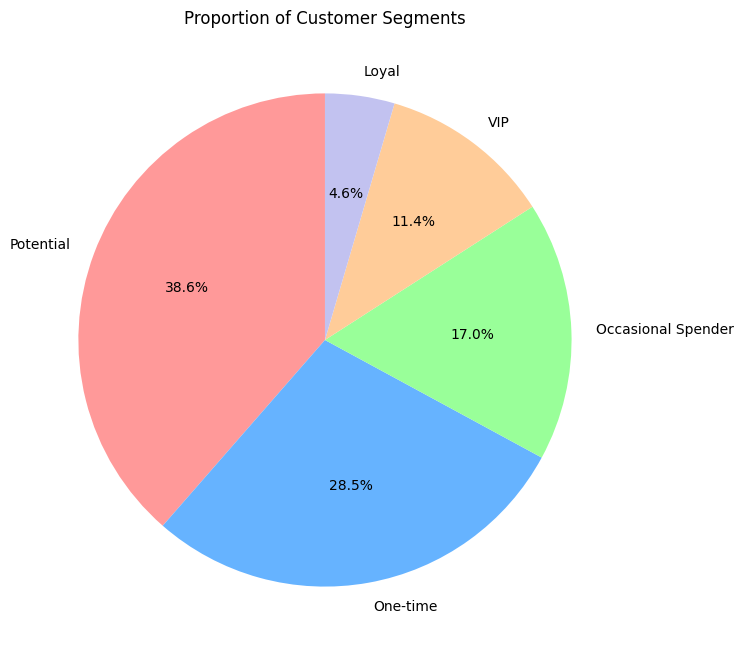

In [3]:
# Calculate the value counts for the customer segments
segment_counts = customer_segmentation['customer_segment'].value_counts()

# Define the custom colors for each segment
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6']

# Plot the pie chart with custom colors
plt.figure(figsize=(7, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Customer Segments')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
